# Data Analysis - Wikipedia Dataset

The full article about this task is on https://diff.wikimedia.org/2017/02/02/hiring-data-scientist/

The dataset and what needs to be done are on https://github.com/wikimedia-research/Discovery-Hiring-Analyst-2016

#### Last Checkpoint: 07/05/2020

## Dataset glossary

- **Column**	Value	Description
- **uuid**	string	Universally unique identifier (UUID) for backend event handling.
- **timestamp**	integer	The date and time (UTC) of the event, formatted as YYYYMMDDhhmmss.
- **session_id**	string	A unique ID identifying individual sessions.
- **group**	string	A label ("a" or "b").
- **action**	string	Identifies in which the event was created. See below.
- **checkin**	integer	How many seconds the page has been open for.
- **page_id**	string	A unique identifier for correlating page visits and check-ins.
- **n_results**	integer	Number of hits returned to the user. Only shown for searchResultPage events.
- **result_position**	integer	The position of the visited page's link on the search engine results page (SERP).

## Metrics

- Dataset: https://github.com/wikimedia-research/Discovery-Hiring-Analyst-2016/blob/master/events_log.csv.gz
- Team Metrics: 

- Discovery (and other teams within the Foundation) rely on event logging (EL) to track a variety of performance and usage metrics to help us make decisions. Specifically, Discovery is interested in:

- clickthrough rate: the proportion of search sessions where the user clicked on one of the results displayed
- zero results rate: the proportion of searches that yielded 0 results


In [1]:
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


Vamos a necesitar las siguientes librerias: 
(base) C:\Users\Maria>conda list pandas
**packages in environment at C:\Users\Maria\miniconda3:**
**Name                    Version                   Build  Channel**
- pandas                    1.0.3            py37h47e9c7a_0
- numpy                     1.18.1           py37h93ca92e_0
- seaborn                   0.10.0                     py_0

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Viz try
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

### Loading the data
(*)Disclaimer: I am having some problem reading the timestamp as a datetime so I am forcing the variable to be read as a string to convert later to a datetime. It worked :)

In [4]:
Rawdata_events = pd.read_csv("events_log.csv", dtype= {'timestamp':'string'})

In [5]:
# Just in case it doesn't work here there is a dictionary 
# data_types= {
# 'uuid':str,
# 'timestamp':str,
# 'session_id':str,
# 'group':str,
# 'action':str,
# 'checkin':int,
# 'page_id':str,
# 'n_results':int,
# 'result_position':int}

### Checking the data looks ok


In [6]:
Rawdata_events.columns

Index(['uuid', 'timestamp', 'session_id', 'group', 'action', 'checkin',
       'page_id', 'n_results', 'result_position'],
      dtype='object')

In [7]:
Rawdata_events.head(5)

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,20160301103842,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,20160307005226,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,20160302145305,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,20160302222701,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,20160302095023,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [8]:
Rawdata_events.tail(5)

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
400160,ffffa98532e154efa821aec083f92674,20160304160310,50d4c8dce4b959c3,b,checkin,120.0,be6ad202740eef90,NaN,2.0
400161,ffffbe4347aa5c4facc64fa4a26e73e4,20160305193201,056fc33556fcd8c0,b,checkin,10.0,c32a6f39204b8c83,NaN,1.0
400162,ffffc4bd7f8e53a1a86b38874c6728b1,20160303144208,f8487a76f255ee62,b,searchResultPage,NaN,b24925ad79226f74,20.0,NaN
400163,ffffe6cffc8d510db61c3f3dce918849,20160307212805,daa2d7654ca30c15,b,searchResultPage,NaN,c5d5fe35920a8833,20.0,NaN
400164,fffff7337bc950ed9b20cfc2886eedaf,20160304144303,c03fb6c935c6959b,a,checkin,30.0,4dc314c73a8fad1b,NaN,1.0


## EDA

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.(source: wikipedia)

We have 3 numerical variables:
- **checkin**: How many seconds the page has been open for.
- **n_results**: Number of hits returned to the user. Only shown for searchResultPage events.
- **result_position**: The position of the visited page's link on the search engine results page (SERP).

In [9]:
Rawdata_events.describe()

,checkin,n_results,result_position
count,223824.000000,136234.000000,230482.000000
mean,97.190382,13.210109,2.992798
std,104.593714,13.271104,38.557292
min,10.000000,0.000000,1.000000
25%,20.000000,2.000000,1.000000
50%,50.000000,20.000000,1.000000
75%,150.000000,20.000000,2.000000
max,420.000000,500.000000,4103.000000


From this output we can infer we would have some problems with outliers in this dataset.
**why?** 
- Checkin: We have a range from 10 to 420 for checking. **What does it mean?**: It means the page wasted 420 second (7 minutes) However 75% of the time this time has been < 150 seconds 2 minutes. 
- n_results: We have a range from 0 to 500 for n_results. **What does it mean?**: It means the search got 500 results for ar least one user. However 75% of this time, users got 20 results or least.
- result_position: We have a range from 1 to 4103 for result_position. **What does it mean**: It means at least one user clicked on the result 4103. However 75% of the time this time has been under 150 seconds 2 minutes

It looks like our data is skewed. First,we would need to calculate the median. 'Median' is a better stat than 'mean' when the data is skewed. It is usually = percentile 50% Just in case. We can visualize the data with histograms to make it crystal clear the distribution. Also boxplots can help us to understand what is happening.

In [10]:
#Sanity check -  Printing median
print("Median of checkin is : % s "
        % Rawdata_events['checkin'].median()) #50 percentile
print("Median of n_results is : % s "
        % Rawdata_events['n_results'].median()) #50 percentile
print("Median of result_position is : % s "
        % Rawdata_events['result_position'].median()) #50 percentile

Median of checkin is : 50.0 
Median of n_results is : 20.0 
Median of result_position is : 1.0 


### Data distribution - How it looks like in an Histogram

count    223824.000000
mean         97.190382
std         104.593714
min          10.000000
25%          20.000000
50%          50.000000
75%         150.000000
max         420.000000
Name: checkin, dtype: float64
count    136234.000000
mean         13.210109
std          13.271104
min           0.000000
25%           2.000000
50%          20.000000
75%          20.000000
max         500.000000
Name: n_results, dtype: float64
count    230482.000000
mean          2.992798
std          38.557292
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        4103.000000
Name: result_position, dtype: float64


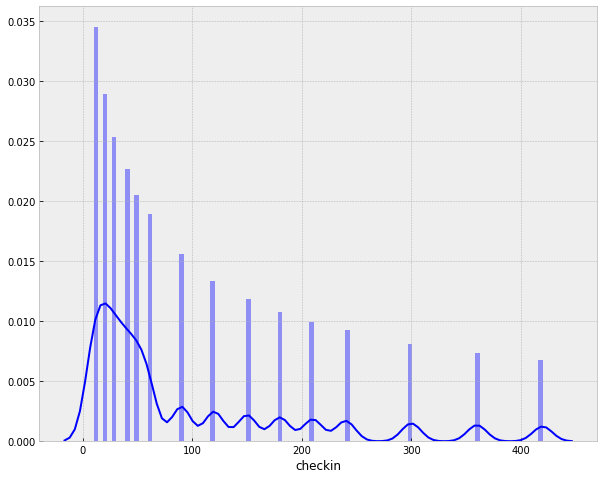

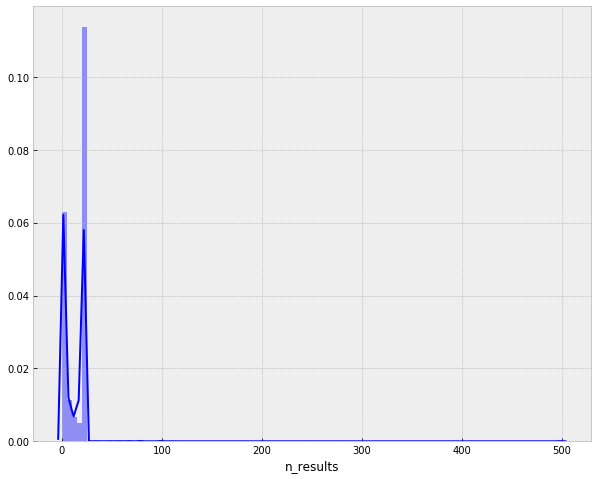

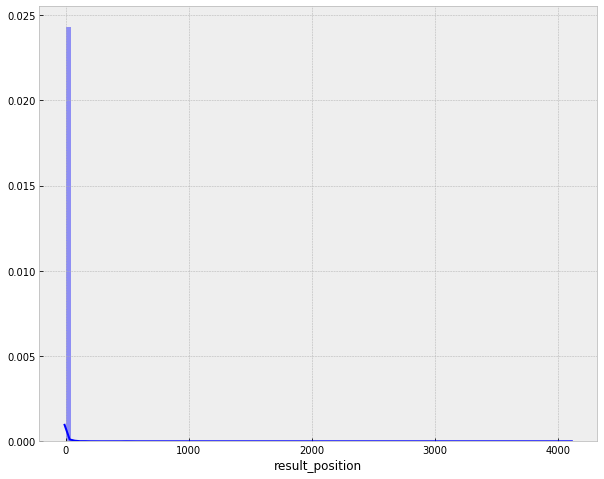

In [11]:
print(Rawdata_events['checkin'].describe())
plt.figure(figsize=(10, 8))
sns.distplot(Rawdata_events['checkin'], color='b', bins=100, hist_kws={'alpha': 0.4});
print(Rawdata_events['n_results'].describe())
plt.figure(figsize=(10, 8))
sns.distplot(Rawdata_events['n_results'], color='b', bins=100, hist_kws={'alpha': 0.4});
print(Rawdata_events['result_position'].describe())
plt.figure(figsize=(10, 8))
sns.distplot(Rawdata_events['result_position'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [12]:
print(Rawdata_events['checkin'].describe())
print(Rawdata_events['n_results'].describe())
print(Rawdata_events['result_position'].describe())

count    223824.000000
mean         97.190382
std         104.593714
min          10.000000
25%          20.000000
50%          50.000000
75%         150.000000
max         420.000000
Name: checkin, dtype: float64
count    136234.000000
mean         13.210109
std          13.271104
min           0.000000
25%           2.000000
50%          20.000000
75%          20.000000
max         500.000000
Name: n_results, dtype: float64
count    230482.000000
mean          2.992798
std          38.557292
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        4103.000000
Name: result_position, dtype: float64


### Creating a datetime for the timestamp

At the beggining of the analysis I commented I have had some problems creating a datetime with the timestamp from the CSV. So I am going to create another variable which I can use as a datetime. Part of the analysis is based on daily data so it would be useful to have a variable for date and our proper timestamp.

Long path to create the timestamp as a datetime from strings

In [13]:
Rawdata_events['year']=Rawdata_events.timestamp.str[:4]
Rawdata_events['month']=Rawdata_events.timestamp.str[4:6]
Rawdata_events['day']=Rawdata_events.timestamp.str[6:8]
Rawdata_events['hour']=Rawdata_events.timestamp.str[8:10]
Rawdata_events['minute']=Rawdata_events.timestamp.str[10:12]
Rawdata_events['second']=Rawdata_events.timestamp.str[12:14]
Rawdata_events.dtypes
%time 

Wall time: 0 ns


Let's create a Date column because it is easier to manage for viz

In [14]:
Rawdata_events['Date']=pd.to_datetime(Rawdata_events[['year','month','day']],errors='coerce')

New Timestamp as a datetime

In [15]:
Rawdata_events['Timestamp']=pd.to_datetime(Rawdata_events[['year','month','day','hour','minute','second']],errors='coerce')

In [16]:
Rawdata_events.dtypes

uuid                       object
timestamp                  string
session_id                 object
group                      object
action                     object
checkin                   float64
page_id                    object
n_results                 float64
result_position           float64
year                       string
month                      string
day                        string
hour                       string
minute                     string
second                     string
Date               datetime64[ns]
Timestamp          datetime64[ns]
dtype: object

We can delete the columns we  used to create 'Date' and 'Timestamp'. I will save a csv to compare it as a sanity check later

In [17]:
df2 = (Rawdata_events.groupby('hour')
         .describe()
         .unstack()
         .unstack(1)
         .reindex(Rawdata_events.columns[1:], level=0))
print(df2)

                       count        mean         std   min   25%   50%    75%  \
                hour                                                            
checkin         00    6542.0   99.967900  105.899149  10.0  20.0  50.0  150.0   
                01    6634.0   98.020802  104.278958  10.0  30.0  50.0  150.0   
                02    6469.0   91.267584  100.083921  10.0  20.0  50.0  120.0   
                03    6225.0  100.597590  107.141056  10.0  20.0  50.0  150.0   
                04    5640.0   96.714539  104.390597  10.0  20.0  50.0  150.0   
...                      ...         ...         ...   ...   ...   ...    ...   
result_position 23    6369.0    3.954938   15.617001   1.0   1.0   1.0    2.0   
                3e       0.0         NaN         NaN   NaN   NaN   NaN    NaN   
                4e       0.0         NaN         NaN   NaN   NaN   NaN    NaN   
                6e       1.0    1.000000         NaN   1.0   1.0   1.0    1.0   
                7e       1.0

Now that we have a datetime we can easily add a column with the day of week. So we have more context about our data.

In [18]:
Rawdata_events['DayofWeek']= Rawdata_events['Timestamp'].dt.day_name()

In [19]:
# Rawdata_events.to_csv('C:\\Users\\Maria\\Desktop\\adevintia_data\\Rawdata_events.csv')
Clean_df = Rawdata_events.drop(columns=['timestamp','year','month','day','hour','minute','second'])
Clean_df.describe

<bound method NDFrame.describe of                                     uuid        session_id group  \
0       00000736167c507e8ec225bd9e71f9e5  78245c2c3fba013a     b   
1       00000c69fe345268935463abbfa5d5b3  c559c3be98dca8a4     a   
2       00003bfdab715ee59077a3670331b787  760bf89817ce4b08     a   
3       0000465cd7c35ad2bdeafec953e08c1a  fb905603d31b2071     a   
4       000050cbb4ef5b42b16c4d2cf69e6358  c2bf5e5172a892dc     a   
...                                  ...               ...   ...   
400160  ffffa98532e154efa821aec083f92674  50d4c8dce4b959c3     b   
400161  ffffbe4347aa5c4facc64fa4a26e73e4  056fc33556fcd8c0     b   
400162  ffffc4bd7f8e53a1a86b38874c6728b1  f8487a76f255ee62     b   
400163  ffffe6cffc8d510db61c3f3dce918849  daa2d7654ca30c15     b   
400164  fffff7337bc950ed9b20cfc2886eedaf  c03fb6c935c6959b     a   

                  action  checkin           page_id  n_results  \
0       searchResultPage      NaN  cbeb66d1bc1f1bc2        5.0   
1       searchRes

We have the name of day and the date looks fine. So we have checked we can find outliers that would affect our analysis (or not). Some questions are refered to daily data. How can be affected the analysis with these 3 numeric variables? Is a consistent trend daily? Let's check out.

In [20]:
df1 = (Clean_df.groupby('Date')
         .describe()
         .unstack()
         .unstack(1)
         .reindex(Clean_df.columns[1:], level=0))
print(df1)

                              count       mean         std   min   25%   50%  \
                Date                                                           
checkin         2016-03-01  34296.0  95.328901  103.674928  10.0  20.0  50.0   
                2016-03-02  34728.0  95.542214  103.789792  10.0  20.0  50.0   
                2016-03-03  34910.0  95.646520  103.869581  10.0  20.0  50.0   
                2016-03-04  24777.0  98.405780  105.393467  10.0  20.0  50.0   
                2016-03-05  19715.0  98.630992  105.349640  10.0  20.0  50.0   
                2016-03-06  22829.0  97.668317  104.281774  10.0  20.0  50.0   
                2016-03-07  28832.0  99.327830  105.644548  10.0  20.0  50.0   
                2016-03-08  23734.0  99.022921  105.573186  10.0  20.0  50.0   
n_results       2016-03-01  18374.0  13.205399   12.126842   0.0   2.0  20.0   
                2016-03-02  18902.0  12.996244   15.911570   0.0   1.0  20.0   
                2016-03-03  19159.0  13.

'checkin' and 'n_results' look consistent if we compare it day on day: 'Max values' and 'Min values' are similar. Also 'mean' and 'sdt'are similar.However, 'Max values' for result_position is different day on day. Let's visualize it in a (almost) boxplot (below) We can see the maximum values are on 2016-03-01 (4104) and 2016-03-05 (1044).

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

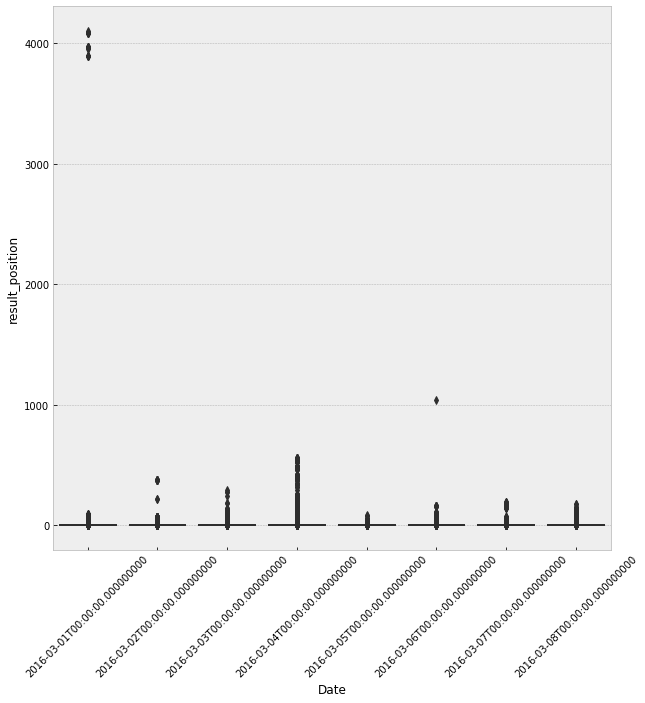

In [21]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(x='Date', y='result_position', data=Clean_df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

So our data says that someone visited the page which was on the SERP in a position > 4000. It is a bit insane for an human (user).The user must feel very frustated. It would be an error or maybe we are dealing with another kind of visitors. Let's say we have 20 results per page. It would mean this user went to page 200 to check it (4000/20). At this point we would think it is an error in the data collection or some of our users are not human or they use an API to search on Wikipedia

Hopefully, We have sessions id. How many sessions an user has during this week?

In [22]:
pages_by_session_df = Clean_df.groupby(by='page_id', as_index=False).agg({'session_id': pd.Series.nunique}).sort_values(by='page_id', ascending=False)

In [23]:
print(pages_by_session_df.sort_values(by='session_id', ascending=False))

                 page_id  session_id
176370  ffff86cddf2a9955           1
58786   55546e4e82f6e314           1
58794   55574576dc3c4e8a           1
58793   55574376b49c1c94           1
58792   5556df6739d6ee46           1
...                  ...         ...
117579  aa43a8aeb30e9115           1
117578  aa42b70d7eee3445           1
117577  aa42ad60ea775279           1
117576  aa4247d153ede541           1
0       000034952d2a6c24           1

[176371 rows x 2 columns]


In [24]:
session_grouped=Clean_df.groupby('session_id')

In [25]:
session_grouped.size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000027A4357B9C8>>

In [26]:
session_grouped.groups

{'0000cbcb67c19c45': Int64Index([361077], dtype='int64'),
 '0001382e027b2ea4': Int64Index([  4371,  13185,  55040, 142278, 173660, 176243, 288377, 311225,
             317464, 345596, 375381, 381398, 388970, 391539, 392547],
            dtype='int64'),
 '0001e8bb90445cb2': Int64Index([ 47697,  97077, 126645, 146035, 155624, 180059, 196332, 216712,
             232576, 239754, 242568, 257428, 260517, 263794, 298942, 388545,
             391674],
            dtype='int64'),
 '000216cf18ae1ab1': Int64Index([135473, 175790, 186594, 313070, 346349, 385605], dtype='int64'),
 '000527f711d50dfc': Int64Index([94598], dtype='int64'),
 '00064fe774048046': Int64Index([139647, 275294, 320184, 340528], dtype='int64'),
 '00071a2cf97168df': Int64Index([211641], dtype='int64'),
 '0007582fe23d51e6': Int64Index([66031], dtype='int64'),
 '0007b7f6b575feb6': Int64Index([  2102,  29978,  32436,  47562,  64412,  84070,  96432, 115900,
             117077, 124500, 174566, 178031, 193173, 225909, 236691, 24816

In [27]:
# Save a copy to analize in Tableau if we can find robots,crawler or bots so they check more than 20 results.
filter_1= (Clean_df['n_results']> 20)
n_results_100=Clean_df.loc[filter_1]
#n_results_100.to_csv('C:\\Users\\Maria\\Desktop\\adevinta\\n_results_100.csv')

In [28]:
#Checking some specific sessions to understand user journey
session_grouped.get_group('00376681bebc19f5')
session_grouped.get_group('004d495a742cf1a9')
#A session_id example where Result_position > 100 
session_grouped.get_group('d1e1aa3236943d94')

,uuid,session_id,group,action,checkin,page_id,n_results,result_position,Date,Timestamp,DayofWeek
401,003af73a3ecd5dddb2cdd55719b695d3,d1e1aa3236943d94,a,visitPage,NaN,673bc1bc0e7f5591,NaN,155.0,2016-03-07,2016-03-07 23:20:14,Monday
7673,04ddca0d6dbe5e67aeacb9e72c0f805e,d1e1aa3236943d94,a,visitPage,NaN,2af9c4d76134d793,NaN,169.0,2016-03-07,2016-03-07 23:05:41,Monday
9320,05f3b81210335d87bc017b70778ee307,d1e1aa3236943d94,a,visitPage,NaN,cc11a600765aeb79,NaN,141.0,2016-03-07,2016-03-07 23:00:06,Monday
14023,08fa9eb7698d5ea99f30aff39b252c61,d1e1aa3236943d94,a,searchResultPage,NaN,31465438bada08e8,179.0,NaN,2016-03-07,2016-03-07 23:14:03,Monday
25928,10ad619e4b60569db847bac2a05b7040,d1e1aa3236943d94,a,checkin,30.0,c769af715188b84f,NaN,163.0,2016-03-07,2016-03-07 23:15:30,Monday
31808,147de4198b015384bb0be6af1bba0da3,d1e1aa3236943d94,a,searchResultPage,NaN,f46b9b9d41076c9e,179.0,NaN,2016-03-07,2016-03-07 23:05:31,Monday
37290,17fa90d4d9545af38491590b4cc353a2,d1e1aa3236943d94,a,checkin,20.0,2af9c4d76134d793,NaN,169.0,2016-03-07,2016-03-07 23:06:01,Monday
41054,1a6bbc952aa05454b12dd5237af9954d,d1e1aa3236943d94,a,checkin,30.0,2af9c4d76134d793,NaN,169.0,2016-03-07,2016-03-07 23:06:11,Monday
58410,2582d1bcaa22508eae704f41bdc4a3e7,d1e1aa3236943d94,a,checkin,10.0,a1e4f854bf016ce9,NaN,163.0,2016-03-07,2016-03-07 23:21:35,Monday
63145,288e23df95905ee09036d9958adf2316,d1e1aa3236943d94,a,checkin,120.0,2af9c4d76134d793,NaN,169.0,2016-03-07,2016-03-07 23:07:41,Monday


In [29]:
Clean_df.groupby('session_id').sum()
Clean_df.groupby('result_position').sum()

,checkin,n_results
result_position,,
1.0,12819540.0,0.0
2.0,2603880.0,0.0
3.0,1331880.0,0.0
4.0,703840.0,0.0
5.0,421790.0,0.0
...,...,...
3895.0,100.0,0.0
3955.0,0.0,0.0
3972.0,210.0,0.0


In [30]:
Clean_df.session_id.value_counts()

b254341e78af2f1a    484
593638dbb24d903a    305
549c7d24637bc68c    250
4264985570c2b41d    234
b1b9ad0b289027e1    223
                   ... 
aa5b8a0c602ec331      1
c7e90b62e31b89d8      1
778beae6828abfba      1
a70add20b80d21f8      1
42b3ece23fdae533      1
Name: session_id, Length: 68028, dtype: int64

In [31]:
Clean_df.page_id.value_counts()

ffeae9d12ad83b25    24
5776ccc6144ff777    20
e6fcfc833df5c687    19
6ea77e97a39691d2    19
6151bd29e99dae15    19
                    ..
201d497a7fcf74db     1
de99624724fa531b     1
9f3400ddac5644d4     1
749c10df78930413     1
ef9f3eed3c0ce484     1
Name: page_id, Length: 176371, dtype: int64

In [32]:
#If n_results > 100. How it works by groups
pd.crosstab(n_results_100["group"],n_results_100["action"],margins=True)

action,searchResultPage,All
group,,
a,395,395
b,14,14
All,409,409


## Caveats and Analysis limitations

Doing the EDA we realise about some limitations we have.
To sum up:
- We have group A and B but the exercise doesn't mention if it is a A/B testing case and if so what it is about. Morever, it is not distribute at 50%
- We have lot of NAN due to the way the events are builts which do harder the analysis.
- We have some evidence that we have 'non human users'.We don't know if they are robots, bots, scrapers or people who have access by API. Due to that, the data is not clean and we could be confused with users behaviour (those who go to the page). Due to that our dataset is skewed.
- We store in the same session several searches. Having a boolean variable to know the first search would make the analysis easier. 

## Further analysis and next steps

It would be interesting to analyze the outliers to understand what is going on with this data. However, it is out of scope for this analysis due to time/effort restriction :). It would be interesting to know how the users engage with the SERPS. However we don't have metrics for that.
For example for checking we would be interested in stopping the ping at some point so we don't waste resources.Someone would have had the open page and leave it.It doesn't give us context about the why. Also we can create an event such us scroll or click outbound link which could be useful to understand how the users work with the SERP. Nowadays we can find also categories on the SERP. It would help to understand if the result is good for the users. 
If we triangulate these metrics with other ones from an Analytics/UX software such us scroll tracking, exits (from Wikipedia page) and bounces. We would undestand better the user behaviours.
A week of date could be not enough if there were a problem with the a/b test implementation. So making sure we run an a/a test first is always useful
Bots and scrapers consume a lot of server resources. It also makes the web less faster. It would be good to check if we can find it and block them in a white/black list.

**n_results**. A 75% of the users get 20 results by session which looks quite razonable for a search. If we know how many results there are per page we could have another metric to compare. We already know that most users don't click more than 2 pages and they used to click on the first results.

**result_position** 

# QUESTIONS

## 1.a What is our daily overall clickthrough rate? How does it vary between the groups?

The team define the overall clickthrough rate as 
- **clickthrough rate**: the proportion of search sessions where the user clicked on one of the results displayed

However, we can see that there are users who are searching in the same session several times.
As we have seen before with the session below (d1e1aa3236943d94) as an example. I think the metric definition should be reviewed.

In [33]:
session_grouped.get_group('d1e1aa3236943d94')

,uuid,session_id,group,action,checkin,page_id,n_results,result_position,Date,Timestamp,DayofWeek
401,003af73a3ecd5dddb2cdd55719b695d3,d1e1aa3236943d94,a,visitPage,NaN,673bc1bc0e7f5591,NaN,155.0,2016-03-07,2016-03-07 23:20:14,Monday
7673,04ddca0d6dbe5e67aeacb9e72c0f805e,d1e1aa3236943d94,a,visitPage,NaN,2af9c4d76134d793,NaN,169.0,2016-03-07,2016-03-07 23:05:41,Monday
9320,05f3b81210335d87bc017b70778ee307,d1e1aa3236943d94,a,visitPage,NaN,cc11a600765aeb79,NaN,141.0,2016-03-07,2016-03-07 23:00:06,Monday
14023,08fa9eb7698d5ea99f30aff39b252c61,d1e1aa3236943d94,a,searchResultPage,NaN,31465438bada08e8,179.0,NaN,2016-03-07,2016-03-07 23:14:03,Monday
25928,10ad619e4b60569db847bac2a05b7040,d1e1aa3236943d94,a,checkin,30.0,c769af715188b84f,NaN,163.0,2016-03-07,2016-03-07 23:15:30,Monday
31808,147de4198b015384bb0be6af1bba0da3,d1e1aa3236943d94,a,searchResultPage,NaN,f46b9b9d41076c9e,179.0,NaN,2016-03-07,2016-03-07 23:05:31,Monday
37290,17fa90d4d9545af38491590b4cc353a2,d1e1aa3236943d94,a,checkin,20.0,2af9c4d76134d793,NaN,169.0,2016-03-07,2016-03-07 23:06:01,Monday
41054,1a6bbc952aa05454b12dd5237af9954d,d1e1aa3236943d94,a,checkin,30.0,2af9c4d76134d793,NaN,169.0,2016-03-07,2016-03-07 23:06:11,Monday
58410,2582d1bcaa22508eae704f41bdc4a3e7,d1e1aa3236943d94,a,checkin,10.0,a1e4f854bf016ce9,NaN,163.0,2016-03-07,2016-03-07 23:21:35,Monday
63145,288e23df95905ee09036d9958adf2316,d1e1aa3236943d94,a,checkin,120.0,2af9c4d76134d793,NaN,169.0,2016-03-07,2016-03-07 23:07:41,Monday


Maybe we could use the page_id as a reference to calculate it.Meanwhile, I will calculate it as the definition does.

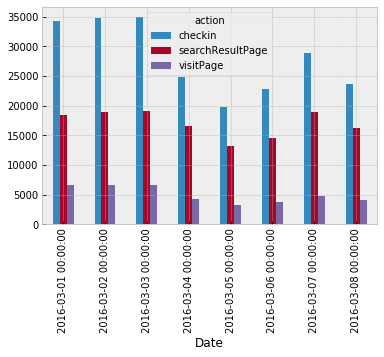

In [34]:
table_question1 = pd.pivot_table(Clean_df, 
                       values='uuid', 
                       index=['Date'], 
                       columns=['action'], 
                       aggfunc=lambda x: len(x.unique()))
table_question1.plot(kind='bar')

### CTR Daily

In [35]:
table_question1['CTR']= table_question1['visitPage'] / table_question1['searchResultPage']
table_question1

action,checkin,searchResultPage,visitPage,CTR
Date,,,,
2016-03-01,34296,18374,6654,0.362142
2016-03-02,34728,18902,6692,0.354037
2016-03-03,34910,19159,6574,0.343129
2016-03-04,24777,16674,4294,0.257527
2016-03-05,19715,13204,3323,0.251666
2016-03-06,22829,14612,3758,0.257186
2016-03-07,28832,19011,4714,0.247962
2016-03-08,23734,16297,4098,0.251457


In [36]:
# Save to csv
# table_question1.to_csv('C:\\Users\\Maria\\Desktop\\table_question1.csv')

*Sanity check* with a crosstab

In [37]:
date_action_tabla =pd.crosstab(Clean_df["Date"],Clean_df["action"],margins=True)
print(date_action_tabla)

action               checkin  searchResultPage  visitPage     All
Date                                                             
2016-03-01 00:00:00    34296             18374       6654   59324
2016-03-02 00:00:00    34728             18902       6692   60322
2016-03-03 00:00:00    34910             19159       6574   60643
2016-03-04 00:00:00    24777             16674       4294   45745
2016-03-05 00:00:00    19715             13204       3323   36242
2016-03-06 00:00:00    22829             14612       3758   41199
2016-03-07 00:00:00    28832             19011       4714   52557
2016-03-08 00:00:00    23734             16297       4098   44129
All                   223821            136233      40107  400161


In [38]:
total_searchResultPage= table_question1['searchResultPage'].sum()
total_checkin = table_question1['checkin'].sum()
total_visitPage = table_question1['visitPage'].sum()
print(total_checkin)
print(total_searchResultPage)
print(total_visitPage)
print(total_searchResultPage + total_checkin + total_visitPage)

223821
136233
40107
400161


In [39]:
session_grouped.get_group('d1e1aa3236943d94')

,uuid,session_id,group,action,checkin,page_id,n_results,result_position,Date,Timestamp,DayofWeek
401,003af73a3ecd5dddb2cdd55719b695d3,d1e1aa3236943d94,a,visitPage,NaN,673bc1bc0e7f5591,NaN,155.0,2016-03-07,2016-03-07 23:20:14,Monday
7673,04ddca0d6dbe5e67aeacb9e72c0f805e,d1e1aa3236943d94,a,visitPage,NaN,2af9c4d76134d793,NaN,169.0,2016-03-07,2016-03-07 23:05:41,Monday
9320,05f3b81210335d87bc017b70778ee307,d1e1aa3236943d94,a,visitPage,NaN,cc11a600765aeb79,NaN,141.0,2016-03-07,2016-03-07 23:00:06,Monday
14023,08fa9eb7698d5ea99f30aff39b252c61,d1e1aa3236943d94,a,searchResultPage,NaN,31465438bada08e8,179.0,NaN,2016-03-07,2016-03-07 23:14:03,Monday
25928,10ad619e4b60569db847bac2a05b7040,d1e1aa3236943d94,a,checkin,30.0,c769af715188b84f,NaN,163.0,2016-03-07,2016-03-07 23:15:30,Monday
31808,147de4198b015384bb0be6af1bba0da3,d1e1aa3236943d94,a,searchResultPage,NaN,f46b9b9d41076c9e,179.0,NaN,2016-03-07,2016-03-07 23:05:31,Monday
37290,17fa90d4d9545af38491590b4cc353a2,d1e1aa3236943d94,a,checkin,20.0,2af9c4d76134d793,NaN,169.0,2016-03-07,2016-03-07 23:06:01,Monday
41054,1a6bbc952aa05454b12dd5237af9954d,d1e1aa3236943d94,a,checkin,30.0,2af9c4d76134d793,NaN,169.0,2016-03-07,2016-03-07 23:06:11,Monday
58410,2582d1bcaa22508eae704f41bdc4a3e7,d1e1aa3236943d94,a,checkin,10.0,a1e4f854bf016ce9,NaN,163.0,2016-03-07,2016-03-07 23:21:35,Monday
63145,288e23df95905ee09036d9958adf2316,d1e1aa3236943d94,a,checkin,120.0,2af9c4d76134d793,NaN,169.0,2016-03-07,2016-03-07 23:07:41,Monday


## 1.b How does it vary between the groups?

In [40]:
a_b_tabla = pd.crosstab(Clean_df["group"],Clean_df["action"],margins=True)
print(a_b_tabla)

action  checkin  searchResultPage  visitPage     All
group                                               
a        173698             92056      33265  299019
b         50126             44178       6842  101146
All      223824            136234      40107  400165


In [41]:
a_ctr = pd.pivot_table(Rawdata_events[Rawdata_events.group == 'a'], 
                        values='uuid', 
                        index=['Date'], 
                        columns=['action'], 
                        aggfunc=lambda x: len(x.unique()))

In [42]:
b_ctr = pd.pivot_table(Rawdata_events[Rawdata_events.group == 'b'], 
                        values='uuid', 
                        index=['Date'], 
                        columns=['action'], 
                        aggfunc=lambda x: len(x.unique()))

Group A AxesSubplot(0.125,0.125;0.775x0.755)
Group B AxesSubplot(0.125,0.125;0.775x0.755)


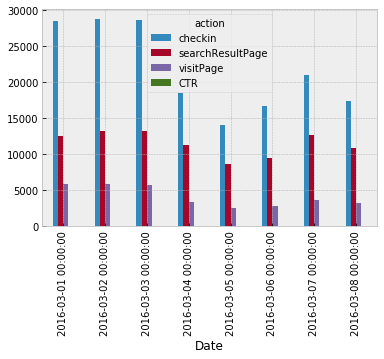

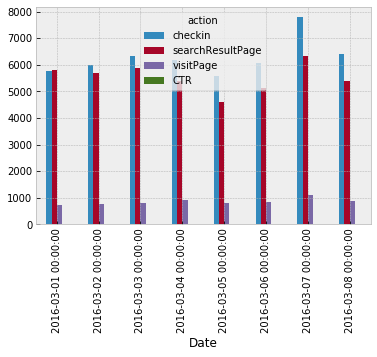

In [43]:
a_ctr['CTR']= a_ctr ['visitPage'] / a_ctr ['searchResultPage']
b_ctr['CTR']= b_ctr['visitPage'] / b_ctr['searchResultPage']

table_question2a=a_ctr
print('Group A',table_question2a.plot(kind='bar'))
table_question2b=b_ctr
print('Group B', table_question2b.plot(kind='bar'))

CTR (group A) is higher and it goes from 29% a 47% . Group B goes from 12,5% to 17,6%

## 2, Which results do people tend to try first? 

Following the example given, we are interested in 'visit page' by 'session_id' ordered by Timestamp

In [44]:
#visitpage_first.groupby('session_id')

#session_grouped.get_group('00376681bebc19f5')

In [45]:
Clean_df.sort_values('Timestamp')

,uuid,session_id,group,action,checkin,page_id,n_results,result_position,Date,Timestamp,DayofWeek
336011,d6b87ce39b195ca0a5adecc48aaa6276,cbba9a98ba7b20cc,a,checkin,60.0,f79f531304a265f8,NaN,4.0,2016-03-01,2016-03-01 00:00:01,Tuesday
88336,38ae77f3e7145186b2f8631c578e39db,cbba9a98ba7b20cc,a,searchResultPage,NaN,1376f8a941d1ce98,20.0,NaN,2016-03-01,2016-03-01 00:00:02,Tuesday
236956,976a1ff3925a516aba858b8ad20cb9f9,c1f0f8499c6655cd,b,checkin,20.0,88bebe600b777ea9,NaN,NaN,2016-03-01,2016-03-01 00:00:02,Tuesday
72364,2e71e942d17f5999a0e33d2b66b88520,614eaa17120fe46b,b,checkin,40.0,756d326815bc60c9,NaN,1.0,2016-03-01,2016-03-01 00:00:02,Tuesday
80189,3373b4f03236565e8e36c35388831c8a,32edcb654a1dee57,b,checkin,150.0,d6122cfa99f1809f,NaN,1.0,2016-03-01,2016-03-01 00:00:05,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
322597,ce24d7da6570507ab39e5d3c27803474,925112c6058e8990,a,searchResultPage,NaN,de4ef57e93030da9,0.0,NaN,2016-03-08,2016-03-08 20:24:32,Tuesday
40952,1a5b663f6a1258f588dc4de65c90b5c0,35a29e7a78ccc24b,a,checkin,180.0,8f0d489715dd14b0,NaN,NaN,NaT,NaT,NaN
157636,6509e446fe7852fbb503af7d3453c6df,aa89be8089ff5694,a,checkin,420.0,2ba84fc2f11fbc92,NaN,1.0,NaT,NaT,NaN
221506,8d8ffe3bfba4516f9d0d8c1decbe1b76,13cd6d70d0fa2b58,a,checkin,120.0,041d0e94cde215fd,NaN,1.0,NaT,NaT,NaN


In [46]:
df2=Clean_df[Clean_df['action']=='visitPage']
(df2.groupby(['session_id', 'Timestamp']).size() 
   .sort_values(ascending=False) 
   .reset_index() 
   .drop_duplicates(subset='Timestamp'))
df2.describe

<bound method NDFrame.describe of                                     uuid        session_id group     action  \
21      0002d29d932e539993a6b1720340a993  b2b413b1432226f8     a  visitPage   
29      0003edb9988255be80e800a83c8bcbe6  7d3304f88a44cb78     a  visitPage   
57      000892cfabc25873b2e5b9da2ef8d734  761d4fbd6aa1c867     a  visitPage   
77      000b3be6a1d651518d622641ad3de358  92891186ca96fd5d     a  visitPage   
100     000e24fe8b6f5efa909bf7b7f940cbc3  fbf64f1d9b0558bf     a  visitPage   
...                                  ...               ...   ...        ...   
400111  fff6828145c95255a1870a9bc1889d87  c7bdf8feda75f225     a  visitPage   
400124  fff8b2b9724d5c129e5cb126bca9556b  18f8cd9e2828a8b1     b  visitPage   
400126  fff9014c28c65f14a22f7f05989ddefc  c34bdc26729055b5     a  visitPage   
400141  fffc607b8d045e839c434ec48b73dbfe  6bcfdb4535e23dad     b  visitPage   
400149  fffd996667685156bc8c93021fbc601d  0c5244f6d3e2fbbd     a  visitPage   

        checkin  

In [47]:
pd.crosstab(df2["group"],df2["result_position"],margins=True)

result_position,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,533.0,560.0,561.0,1044.0,3895.0,3955.0,3972.0,4087.0,4103.0,All
group,,,,,,,,,,,,,,,,,,,,,
a,16708,3907,1991,1120,704,504,379,253,208,189,...,1,1,1,1,1,1,1,1,1,27319
b,4555,951,491,238,143,109,57,40,29,27,...,0,0,0,0,0,0,0,0,0,6760
All,21263,4858,2482,1358,847,613,436,293,237,216,...,1,1,1,1,1,1,1,1,1,34079


In [48]:
a_first = pd.pivot_table(df2[df2.group == 'a'], 
                        values='uuid', 
                        index=['Date'], 
                        columns=['result_position'], 
                        aggfunc=lambda x: len(x.unique()))
a_first

result_position,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,531.0,533.0,560.0,561.0,1044.0,3895.0,3955.0,3972.0,4087.0,4103.0
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,2348.0,571.0,248.0,156.0,99.0,59.0,56.0,30.0,25.0,27.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
2016-03-02,2356.0,533.0,315.0,176.0,102.0,75.0,53.0,46.0,36.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-03,2480.0,555.0,304.0,151.0,97.0,70.0,58.0,40.0,39.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-04,2084.0,473.0,225.0,134.0,80.0,58.0,35.0,28.0,21.0,15.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-05,1515.0,392.0,184.0,100.0,69.0,42.0,43.0,17.0,22.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-06,1761.0,437.0,215.0,117.0,71.0,58.0,36.0,26.0,20.0,23.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2016-03-07,2231.0,490.0,272.0,154.0,88.0,72.0,58.0,40.0,22.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-08,1933.0,456.0,228.0,132.0,98.0,70.0,40.0,26.0,23.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


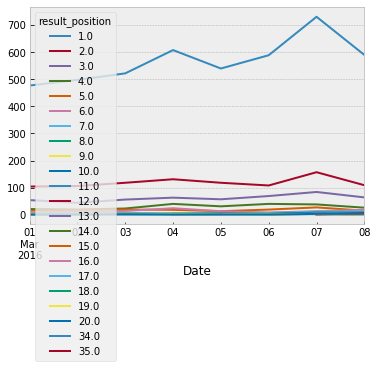

In [49]:
b_first = pd.pivot_table(df2[df2.group == 'b'], 
                        values='uuid', 
                        index=['Date'], 
                        columns=['result_position'], 
                        aggfunc=lambda x: len(x.unique()))
b_first.plot(kind='line')

In both groups both users try the first position first. It would be interesting to know what happens after that if they return to the SERP,exit or they click another result

## 3. What is our daily overall zero results rate? How does it vary between the groups?


**zero results rate**: the proportion of searches that yielded 0 results


In [ ]:
df3=Clean_df[Clean_df['action']=='searchResultPage']
df3=df3[df3['n_results']==0.0]
df3.n_results.describe

In [ ]:
#df3.n_results.describe

In [ ]:
a_zero = pd.pivot_table(df3[df3.group == 'a'], 
                        values='uuid', 
                        index=['Date'], 
                        columns=['n_results'], 
                        aggfunc=lambda x: len(x.unique()))
print('group a', a_zero.plot(kind='line'))

In [ ]:
b_zero = pd.pivot_table(df3[df3.group == 'b'], 
                        values='uuid', 
                        index=['Date'], 
                        columns=['n_results'], 
                        aggfunc=lambda x: len(x.unique()))
print('group b', b_zero.plot(kind='line'))

In [ ]:
df3_non=Clean_df[Clean_df['action']=='searchResultPage']
df3_non=df3_non[df3_non['n_results']> 0.0].sum()
df3_non.n_results.describe

In [ ]:
df3_total = df3 + df3_non

In [ ]:
a_non_zero = pd.pivot_table(df3_non[df3_non.group == 'a'], 
                        values='uuid', 
                        index=['Date'], 
                        columns=['n_results'], 
                        aggfunc=lambda x: len(x.unique()))
print('group b', a_non_zero.plot(kind='bar'))

In [ ]:
b_non_zero = pd.pivot_table(df3_non[df3_non.group == 'b'], 
                        values='uuid', 
                        index=['Date'], 
                        columns=['n_results'], 
                        aggfunc=lambda x: len(x.unique()))
print('group b', b_non_zero.plot(kind='line'))

There are less zero results in group b because the sample is smaller than group a for every day. However, for the zero results rate we don't find a big difference between 2 groups. It is quite stable ~18%

### 4. Let session length be approximately the time between the first event and the last event in a session. Choose a variable from the dataset and describe its relationship to session length

In [ ]:
# Calculate session lenght 
Clean_df['min'] = Clean_df.groupby('session_id')['checkin'].transform('min')
Clean_df['max'] = Clean_df.groupby('session_id')['checkin'].transform('max')
Clean_df['session_lenght']= Clean_df['max']-Clean_df['min']

In [ ]:
Clean_df

In [ ]:
df6_corr=Clean_df.loc[:, ['session_id','action','n_results','session_lenght']]
filter_3= (df6_corr['action']=='searchResultPage')
df6_corr=df6_corr.loc[filter_3]
df6_corr

I would like to know if there is a relationship between the number of results and the session lenght. We need to study the correlation between both variables.

In [ ]:
df6_corr.drop(columns=['action'])

In [ ]:
# Matplot
# plt.matshow(df6_corr.corr())

In [ ]:
#Seaborn
corr = df6_corr.corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)

In [ ]:
#Seaborn
corr = df6_corr.corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)

We have seen we have outliers in our data. Pearson test is sensible to outliers/non normal distribution. So i am going to calculate also Spearman test.(non parmetric test)


In [ ]:
df6_corr.corr(method='spearman')

In [ ]:
# Pearson is the most used test. However it is quite sensible (Data should follow a Normal distribution. It doesn't work well with outliers) For that reason the results are different for both tests
df6_corr.corr(method='pearson')

In [ ]:
# There is another non parametric test which can be used by ordinal and continous variables. 
df6_corr.corr(method='kendall')

In [ ]:
plt.plot(df6_corr["n_results"], df6_corr["session_lenght"], "ro")
plt.title("Relationship n_results to session length")

We can say there are not statistically significant relationship between both variables after doing the tests and checking the visualization.